<a href="https://colab.research.google.com/github/Carlys222/UNIDAD-1/blob/main/PROYECTO_BASE_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-1/refs/heads/main/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Coeficiente de correlacion:  0.9782

Coeficiente de determinacion:  0.9570

intervalo de confianza de b1 de  5%
 9425.9980 < b1 <  9473.9266
            df      sum_sq     mean_sq           F        PR(>F)
Salary     1.0  223.501695  223.501695  622.507203  1.143068e-20
Residual  28.0   10.052972    0.359035         NaN           NaN
 valor_p Test de shapiro:  0.1952

Valor_p de Breusch-Pagan:  0.5276



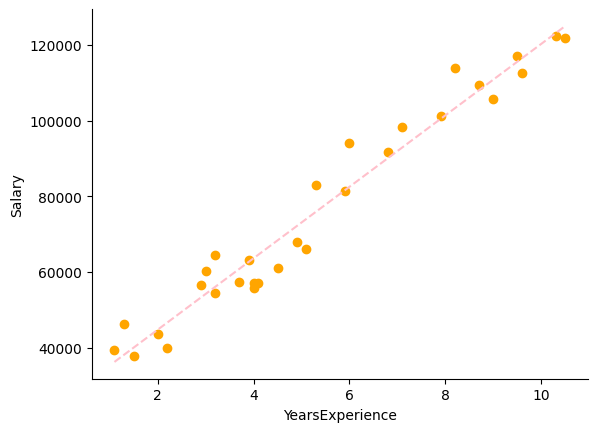

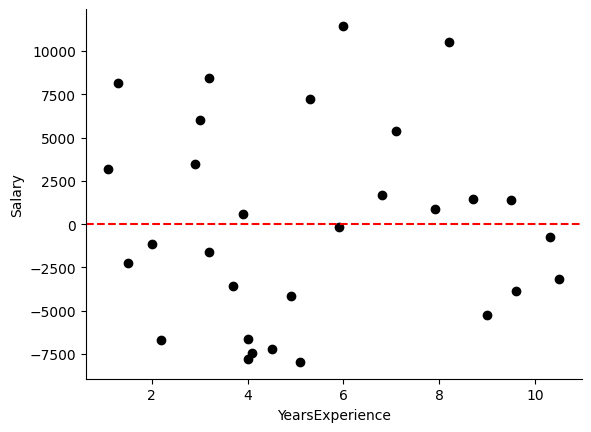

In [2]:
# Establecer una variable dependiente (Y) y una variable independiente (X).

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Carlys222/UNIDAD-1/refs/heads/main/Salary_Data.csv')
df.dropna(inplace=True)
X = df['YearsExperience'] # Variable independiente
Y = df['Salary'] # Variable dependiente

# Grafico de dispercion y recta de regresion ajustada
import matplotlib.pyplot as plt
plt.figure()
plt.scatter (X, Y, color = 'Orange')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Recta de regresion lineal
import statsmodels.api as sm
X_constante = sm.add_constant(X)
modelo = sm.OLS(Y, X_constante).fit()

b0, b1 = modelo.params

Fun = lambda X: b0 + b1 * X

Yc = Fun(X)

plt.plot(X, Yc, color = 'pink', linestyle = '--')

# Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
from scipy.stats import pearsonr
r,_ = pearsonr(X,Y)
print(f'Coeficiente de correlacion: {r: 0.4f}\n')

print(f'Coeficiente de determinacion: {r ** 2: 0.4f}\n')
# Obtén un intervalo de confianza de 95% para la pendiente e interpreta el resultado. Respalda tu conclusión usando ANOVA.
nivel_de_confianza = 0.05
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'intervalo de confianza de b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}')

# Tabla ANOVA
from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols('YearsExperience ~ Salary', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
print(tabla_anova)

# Verifica los supuestos.
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'black')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'red', linestyle = '--')

from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f' valor_p Test de shapiro: {valor_p_sh: 0.4f}\n')

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, X_constante)
print(f'Valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
